In [2]:
import numpy as np
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

# from pvalue_metric import metric #some diffrences as __file__ is not defined for jupyter notebooks
import sys
import os
PACKAGE_DIR = Path(os.getcwd()).resolve().parents[0] / 'pvalue_metric'
sys.path.append(str(PACKAGE_DIR))
import metric

from itertools import product

## Testing different combinations

In [3]:
def simulation(test_func, generator1, generator2, n_bootstrap, n_permutation, func1_args={}, func2_args={}, **kwargs):
    
    g1_samples = generator1(**func1_args)
    g2_samples = generator2(**func2_args)
    _, p = test_func(g1_samples, g2_samples, **kwargs)
    p_metric = metric.pvalue_test([g1_samples, g2_samples],test_func, n_bootstrap, n_permutation, **kwargs)[0][0]

    return {'pvalue': p, 'p_metric': p_metric}

In [24]:
size = [15, 50, 100, 500]
n_bootstrap = [ 500]
n_permutation = [ 500]
locations = [0, 0.5, 1, 2]

combins = list(product(locations, size, n_bootstrap, n_permutation))

In [27]:
for combo in combins:
    loc, s, bs, pe = combo
    print(f"location: {loc}, size: {s}, n_bootstrap: {bs}, n_permutation: {pe}")
    print(simulation(stats.ttest_ind,np.random.normal, 
        np.random.normal, bs, pe,
        func1_args={'loc':0, 'scale':1, 'size': s}, 
        func2_args={'loc':loc, 'scale':1, 'size': s}))

location: 0, size: 15, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.8923511977193499, 'p_metric': 0.87}
location: 0, size: 50, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.4027927698469358, 'p_metric': 0.366}
location: 0, size: 100, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.3481714564070745, 'p_metric': 0.29600000000000004}
location: 0, size: 500, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.07345448243176675, 'p_metric': 0.04400000000000004}
location: 0.5, size: 15, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.09954077017556355, 'p_metric': 0.11199999999999999}
location: 0.5, size: 50, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.009876228720148138, 'p_metric': 0.010000000000000009}
location: 0.5, size: 100, n_bootstrap: 500, n_permutation: 500
{'pvalue': 0.0010935734145449388, 'p_metric': 0.0}
location: 0.5, size: 500, n_bootstrap: 500, n_permutation: 500
{'pvalue': 2.2149497369586324e-21, 'p_metric': 0.0}
location: 1, size: 15, n_bootstrap: 500, n_pe

In [11]:
simulation(stats.ttest_ind,np.random.normal, 
        np.random.normal, 500, 500,
        func1_args={'loc':0, 'scale':1, 'size': 50}, 
        func2_args={'loc':0, 'scale':1, 'size': 50})

0.946

In [51]:
# a = np.random.normal(loc=0.0, scale=1.0, size=30)
# b = np.random.normal(loc=0.1, scale=1.0, size=30)
# t, p = stats.ttest_ind(a,b)
# metric.pvalue_test([a,b], stats.ttest_ind, 500, 500)[0][0]

## Bootstrap distribution

mean ratio: 0.16663, mean p-value: 0.4793671116751453
variance of the portions: 0.018446673099999998, variance of p-values: 0.07468133666862245


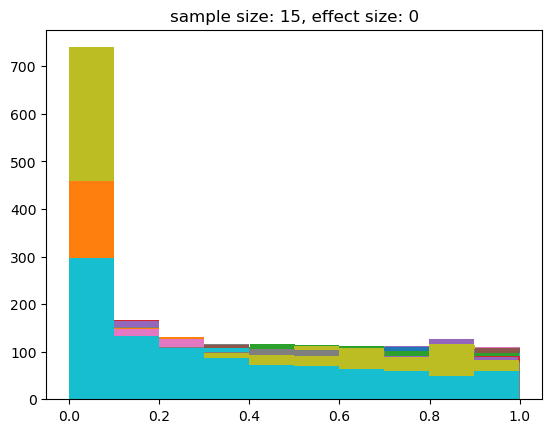

mean ratio: 0.16099, mean p-value: 0.5094745119883544
variance of the portions: 0.0199273299, variance of p-values: 0.07599671794397599


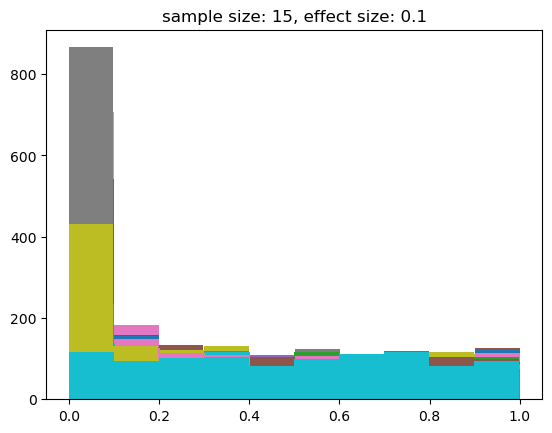

mean ratio: 0.19407, mean p-value: 0.4598328683304315
variance of the portions: 0.03158458510000001, variance of p-values: 0.08330453501134873


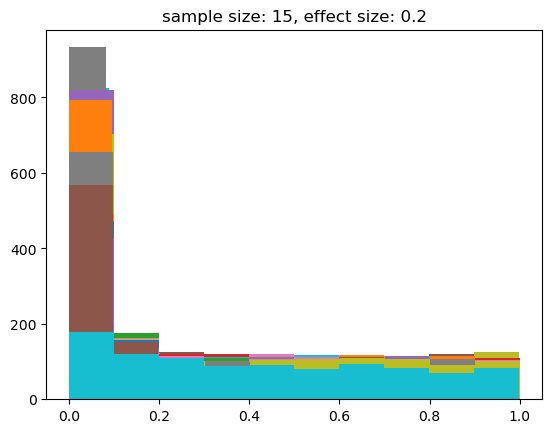

mean ratio: 0.37140999999999996, mean p-value: 0.30218647584290537
variance of the portions: 0.0845857219, variance of p-values: 0.09500521576558164


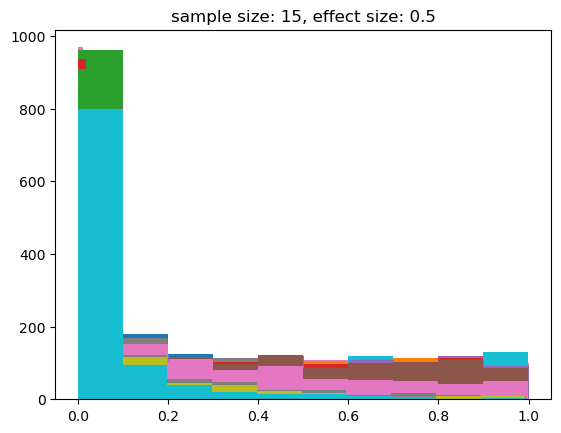

mean ratio: 0.70309, mean p-value: 0.04696662259473354
variance of the portions: 0.06212180190000001, variance of p-values: 0.006536028200438533


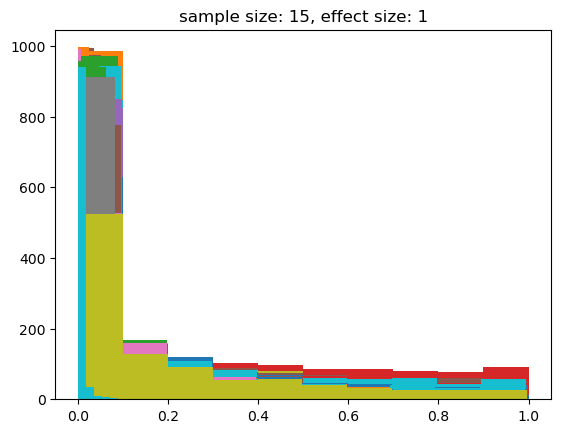

mean ratio: 0.9266500000000001, mean p-value: 0.004199829394378819
variance of the portions: 0.012741367499999996, variance of p-values: 8.181259298699967e-05


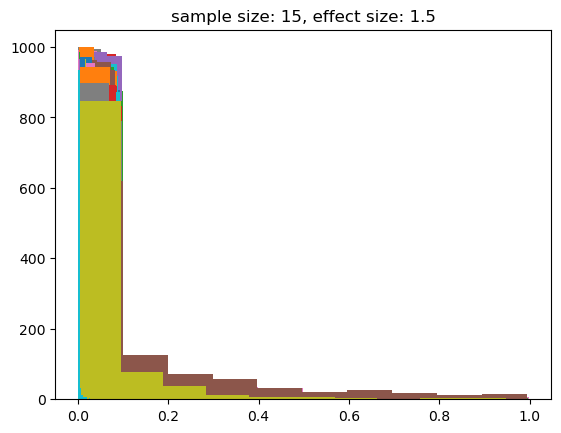

mean ratio: 0.19043, mean p-value: 0.44684230354313526
variance of the portions: 0.0250594651, variance of p-values: 0.08231226134083584


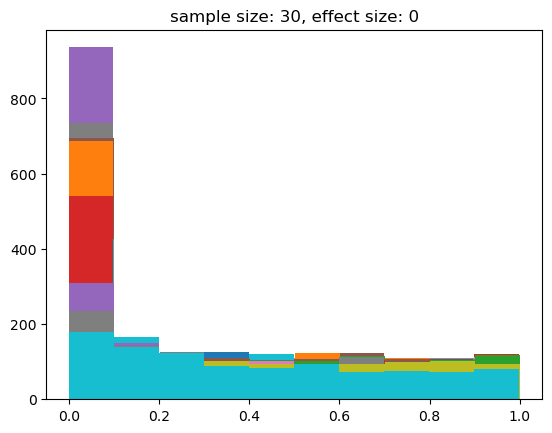

mean ratio: 0.18441999999999997, mean p-value: 0.46328389773350415
variance of the portions: 0.0262946636, variance of p-values: 0.08570478880850811


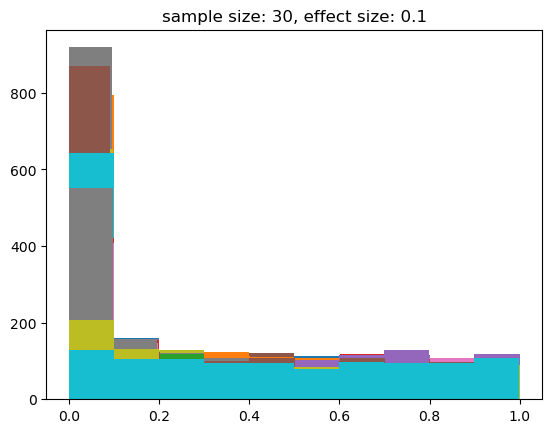

mean ratio: 0.26434, mean p-value: 0.3668005870119129
variance of the portions: 0.045607384399999985, variance of p-values: 0.09058631194082704


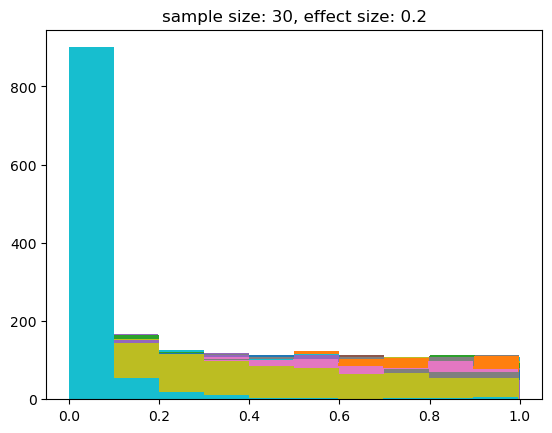

mean ratio: 0.5271300000000001, mean p-value: 0.13803686364641896
variance of the portions: 0.0769283331, variance of p-values: 0.047360603429301144


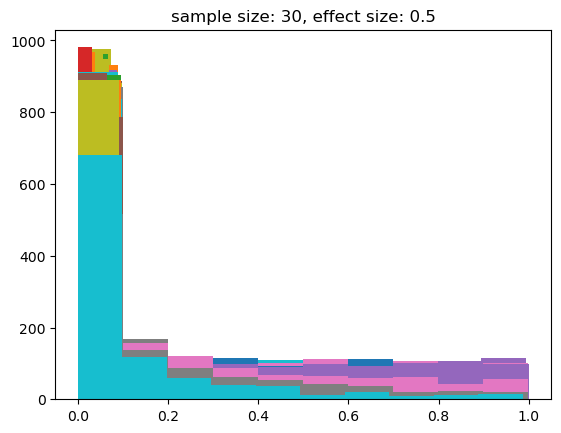

mean ratio: 0.9174500000000001, mean p-value: 0.004573399193517788
variance of the portions: 0.0156244075, variance of p-values: 0.0001869167093995883


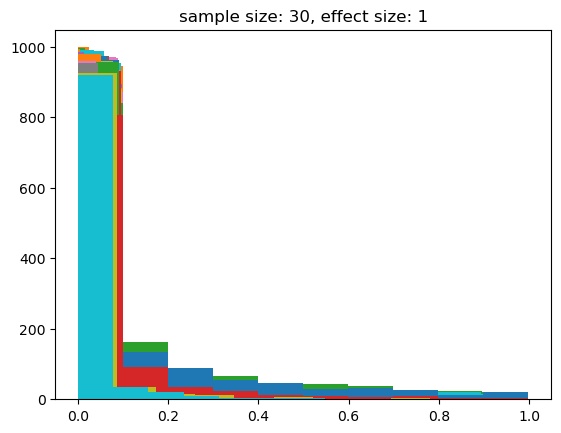

mean ratio: 0.9988999999999999, mean p-value: 6.117123690843598e-06
variance of the portions: 8.710000000000013e-06, variance of p-values: 2.52358541008313e-10


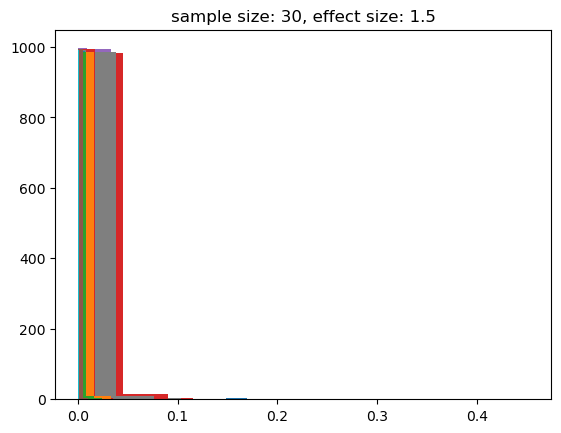

mean ratio: 0.15866, mean p-value: 0.49579881784134744
variance of the portions: 0.0198337244, variance of p-values: 0.06792615472124526


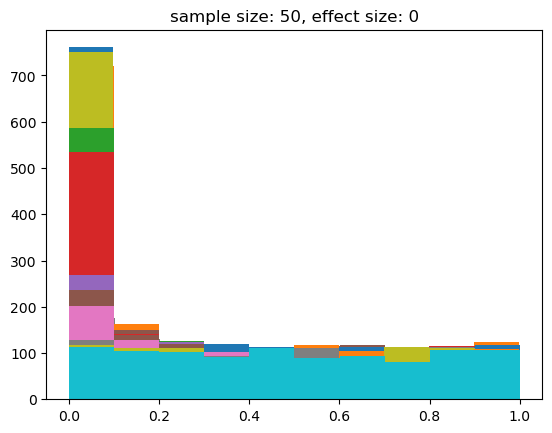

mean ratio: 0.22456000000000004, mean p-value: 0.38934141463183974
variance of the portions: 0.0352697464, variance of p-values: 0.075216003774363


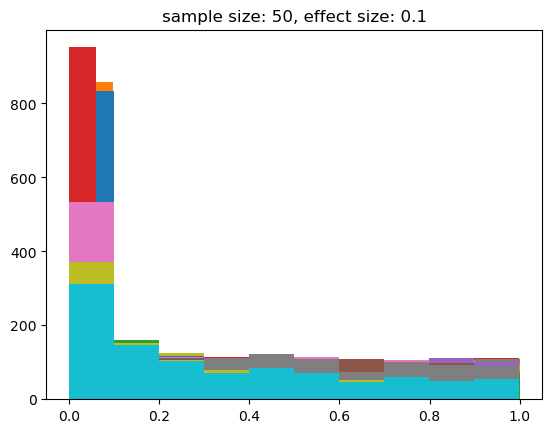

mean ratio: 0.25553000000000003, mean p-value: 0.3812535934690767
variance of the portions: 0.046942489100000005, variance of p-values: 0.09073081726798715


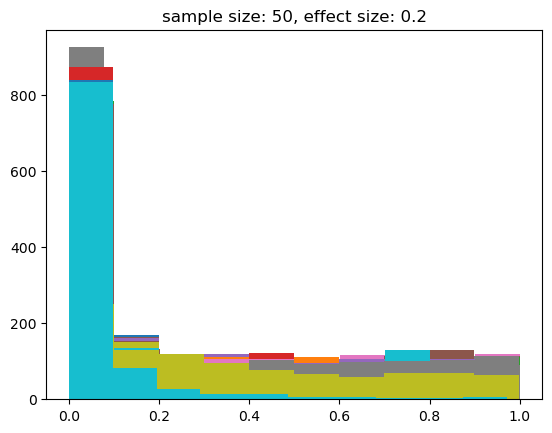

mean ratio: 0.5946799999999999, mean p-value: 0.09718101803740402
variance of the portions: 0.07937291759999998, variance of p-values: 0.03111135170514071


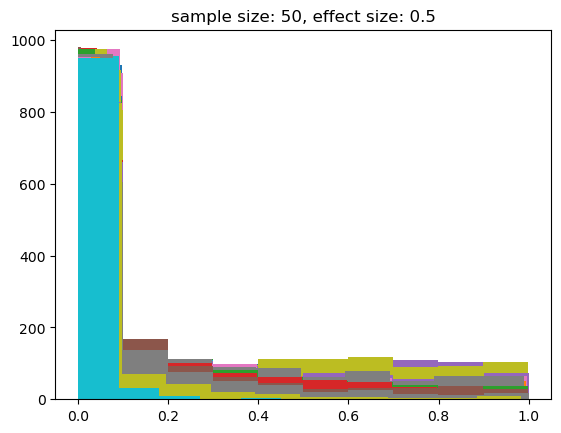

mean ratio: 0.9871, mean p-value: 0.00019556585948206855
variance of the portions: 0.0009525900000000006, variance of p-values: 5.684380624118609e-07


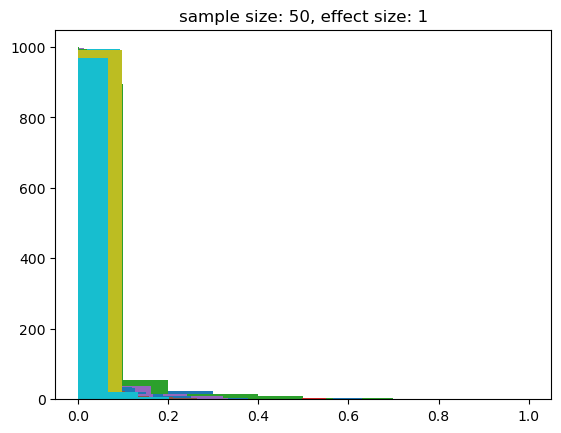

mean ratio: 0.99992, mean p-value: 3.436568651037431e-07
variance of the portions: 3.7360000000000054e-07, variance of p-values: 8.151213277178602e-12


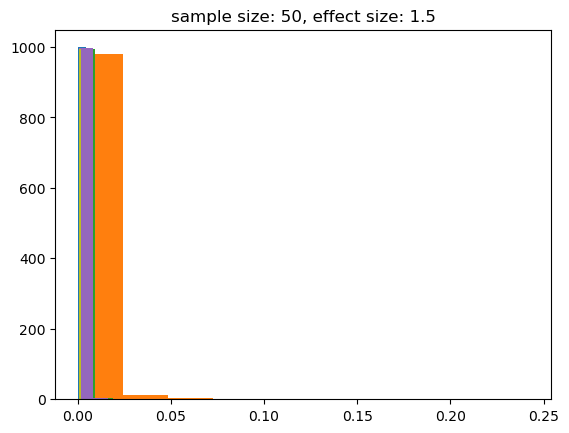

mean ratio: 0.18064, mean p-value: 0.46481887991332194
variance of the portions: 0.0250422504, variance of p-values: 0.08330632693368187


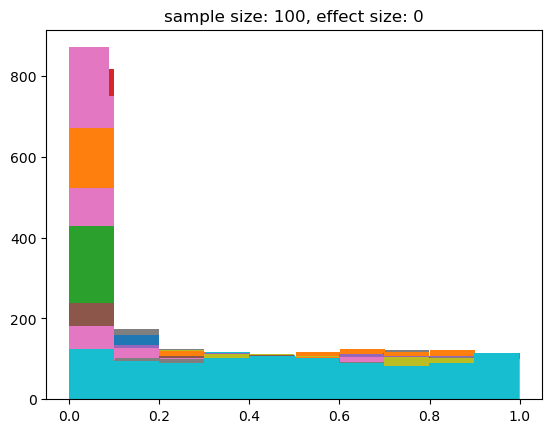

mean ratio: 0.18376000000000003, mean p-value: 0.4589072922918257
variance of the portions: 0.0295637224, variance of p-values: 0.07156492783012577


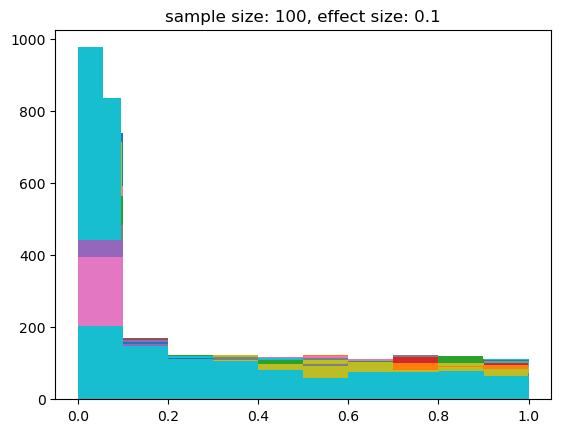

mean ratio: 0.32559999999999995, mean p-value: 0.2871762320075464
variance of the portions: 0.06347881999999999, variance of p-values: 0.07185420473863938


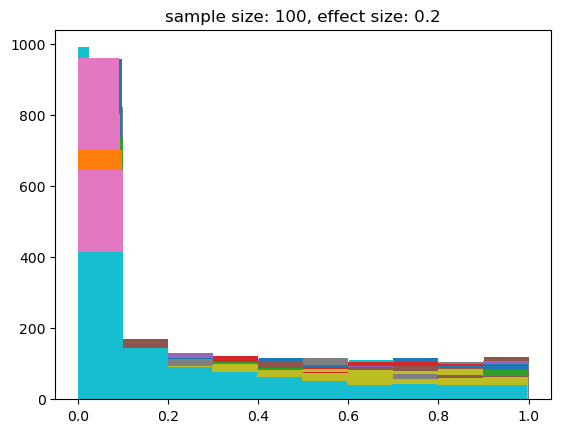

mean ratio: 0.8318500000000002, mean p-value: 0.021145592839928225
variance of the portions: 0.0452463475, variance of p-values: 0.0032607742013221587


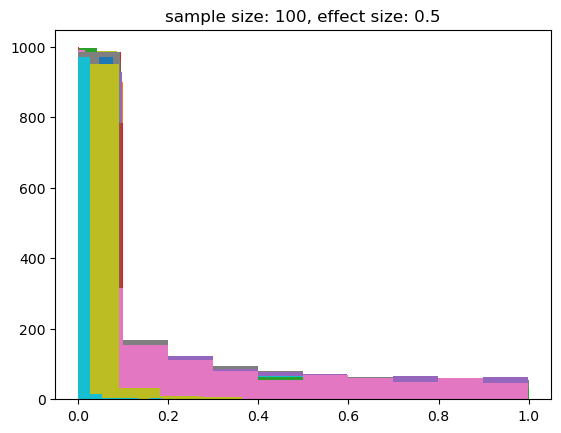

mean ratio: 0.9998900000000001, mean p-value: 1.1517125278302725e-07
variance of the portions: 2.579000000000003e-07, variance of p-values: 2.1717037756453358e-13


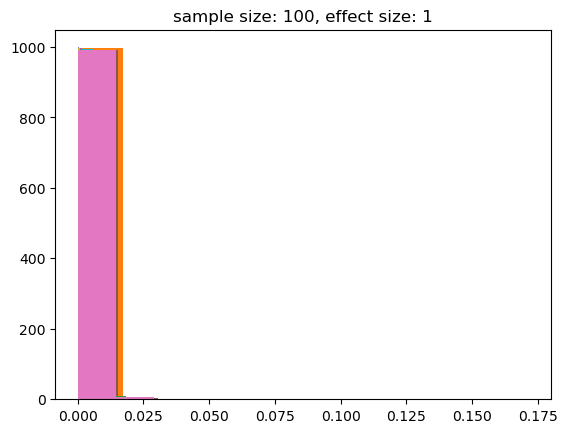

mean ratio: 1.0, mean p-value: 1.711250357480479e-13
variance of the portions: 0.0, variance of p-values: 2.8902760171238058e-24


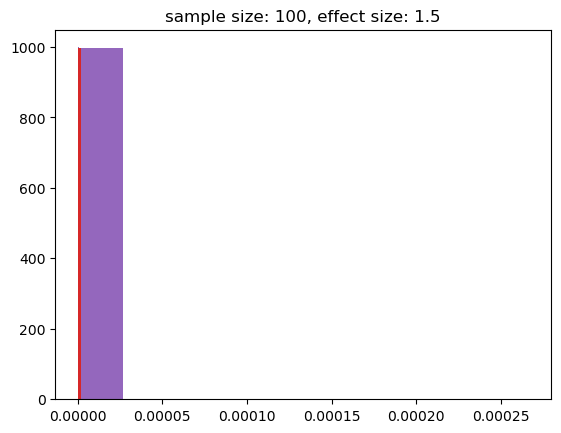

mean ratio: 0.17531999999999998, mean p-value: 0.48517404456204605
variance of the portions: 0.0251677176, variance of p-values: 0.08208395324146447


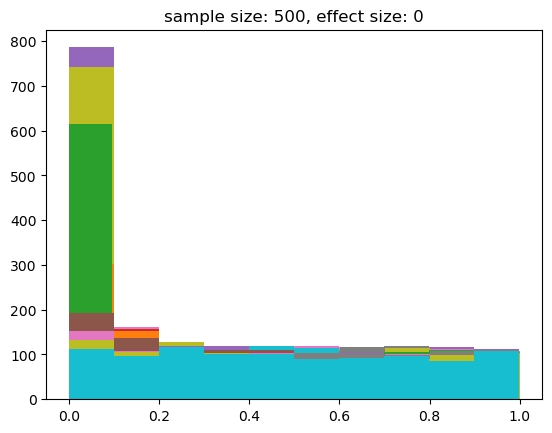

mean ratio: 0.43359000000000003, mean p-value: 0.23873987629766497
variance of the portions: 0.09086030190000001, variance of p-values: 0.08597426739105676


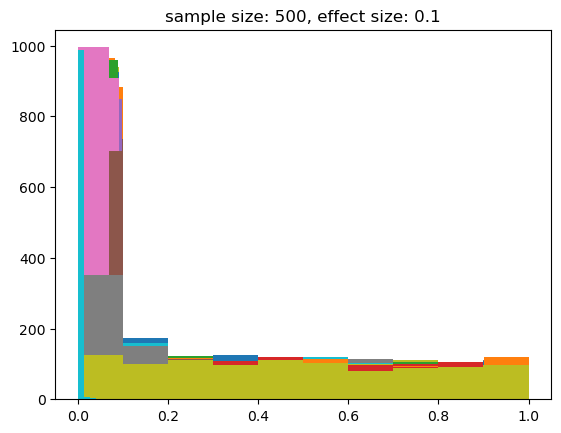

mean ratio: 0.7953300000000002, mean p-value: 0.023727323844996498
variance of the portions: 0.04373932109999999, variance of p-values: 0.004372025036387931


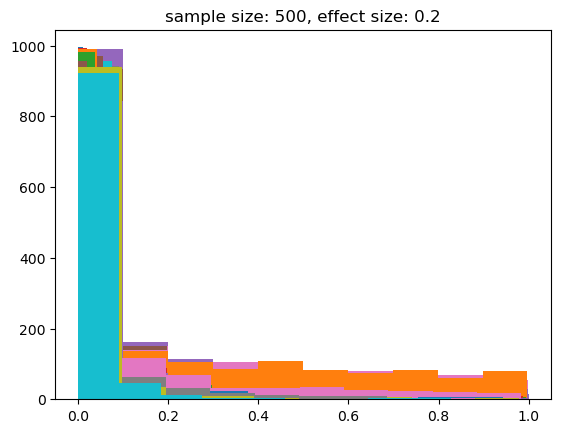

mean ratio: 0.9999899999999999, mean p-value: 3.312228056202428e-09
variance of the portions: 9.900000000000013e-09, variance of p-values: 7.765715043719391e-16


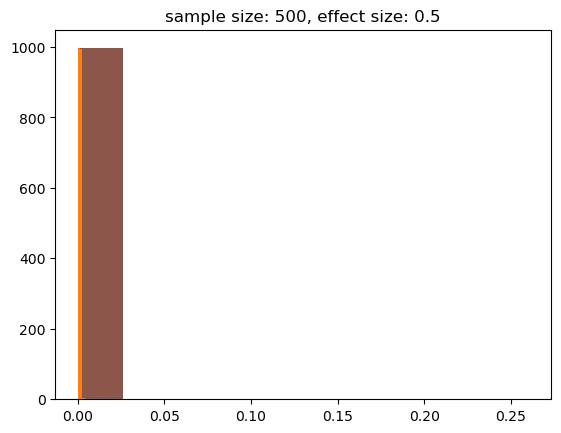

mean ratio: 1.0, mean p-value: 3.6265595606022016e-40
variance of the portions: 0.0, variance of p-values: 1.023649846494479e-77


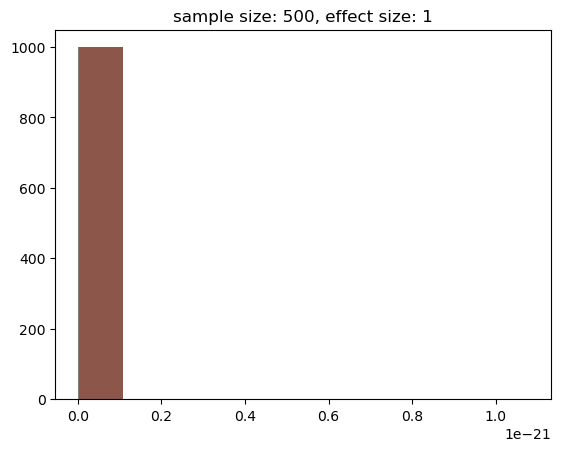

mean ratio: 1.0, mean p-value: 3.108393620550127e-79
variance of the portions: 0.0, variance of p-values: 9.565489571263194e-156


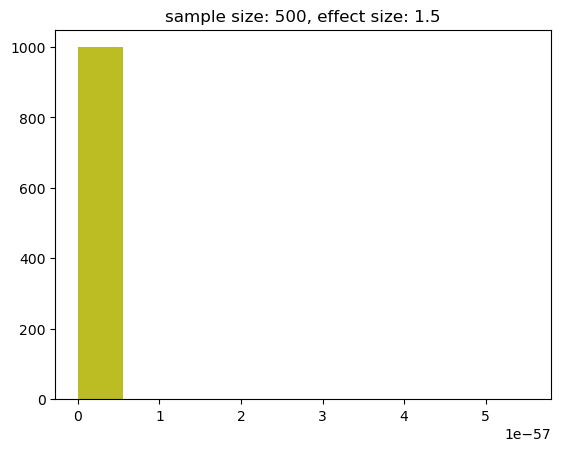

In [12]:
sample_size = [15, 30, 50, 100, 500]
effect_size = [0, 0.1, 0.2, 0.5, 1, 1.5]
itr = 100
n_bootstrap = 1000
for s, e in product(sample_size, effect_size):
    portions = np.zeros(itr)
    pvalues = np.zeros(itr)
    for i in range(itr):
        a = np.random.normal(loc=0.0, scale=1.0, size=s)
        b = np.random.normal(loc=e, scale=1.0, size=s)
        t, pvalues[i] = stats.ttest_ind(a,b)
        #    metric.pvalue_test([a,b], stats.ttest_ind, 500, 500)[0][0]
        original_mean_delta, original_cohort_pvalues = \
            metric.original_cohort_properties([a,b], stats.ttest_ind, n_bootstrap)
        plt.hist(original_cohort_pvalues)
        plt.title(f"sample size: {s}, effect size: {e}")
        # plt.show()
        portions[i] = len(list(filter(lambda p: p< 0.05,original_cohort_pvalues)))/len(original_cohort_pvalues)
        # print(f"portion: {portions[i]}", f"original p-value: {pvalues[i]}")
    print(f"mean ratio: {np.mean(portions)}, mean p-value: {np.mean(pvalues)}")
    print(f"variance of the portions: {np.var(portions)}, variance of p-values: {np.var(pvalues)}")
    plt.show()

In [5]:
# n=10
# data = [[1,2,3,4,5], [6,7,8,9,10]]
# cohort_list = []
# for group in data:
#     bootstrapped = np.zeros((n,len(group)))
#     for i in range(n):
#         bootstrapped[i] = np.random.choice(group, len(group), replace=True)
    
#     cohort_list.append(bootstrapped)

## Zero effect pvalue bootstrap distribution

mean ratio: 0.1631, mean p-value: 0.5150995768985349
variance of the ratios: 0.020668350000000002, variance of p-values: 0.08717017532616804


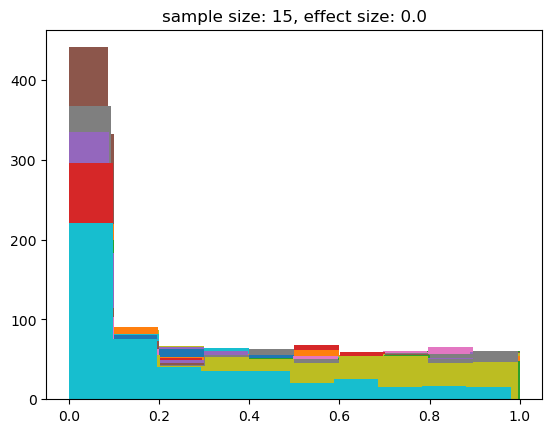

mean ratio: 0.16406, mean p-value: 0.5074454333388753
variance of the ratios: 0.0213373164, variance of p-values: 0.08604975528498131


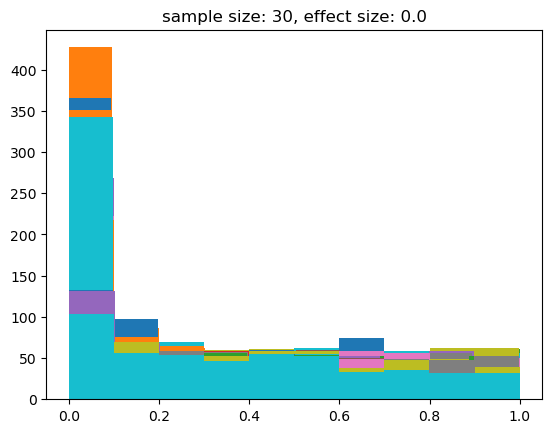

mean ratio: 0.17850000000000002, mean p-value: 0.5004884353158495
variance of the ratios: 0.028960429999999992, variance of p-values: 0.09243410798664042


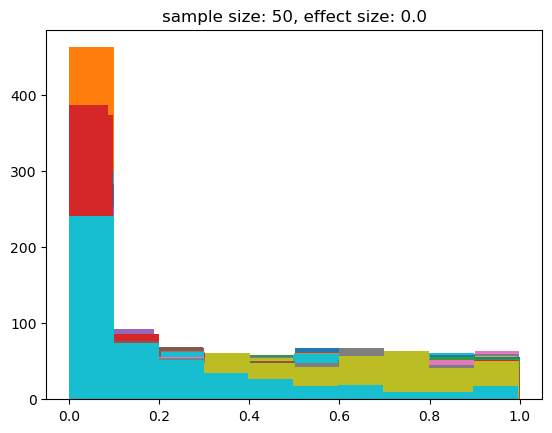

mean ratio: 0.16068, mean p-value: 0.4984381895064613
variance of the ratios: 0.019198897600000004, variance of p-values: 0.0841870065136826


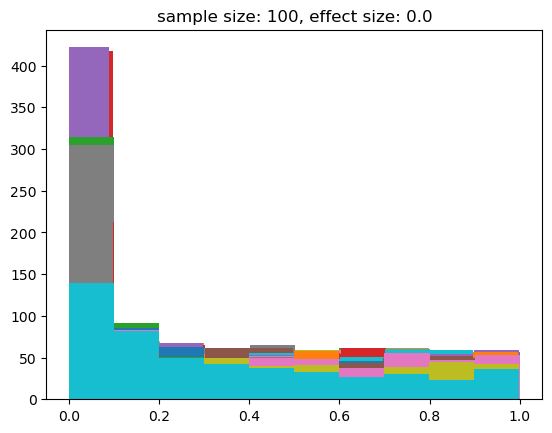

mean ratio: 0.19273999999999997, mean p-value: 0.4531253081338641
variance of the ratios: 0.029963092399999995, variance of p-values: 0.08262831603279826


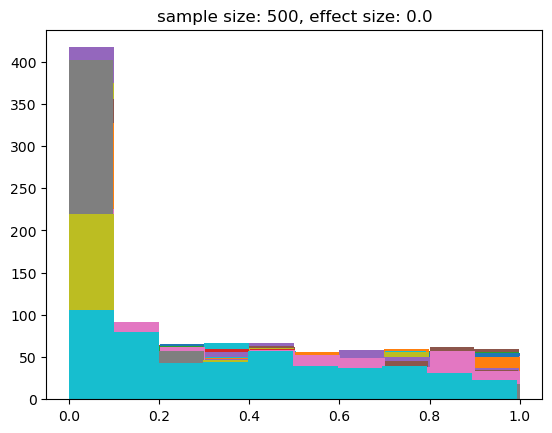

mean ratio: 0.17139999999999997, mean p-value: 0.4683742395926198
variance of the ratios: 0.02003524, variance of p-values: 0.08040930092257603


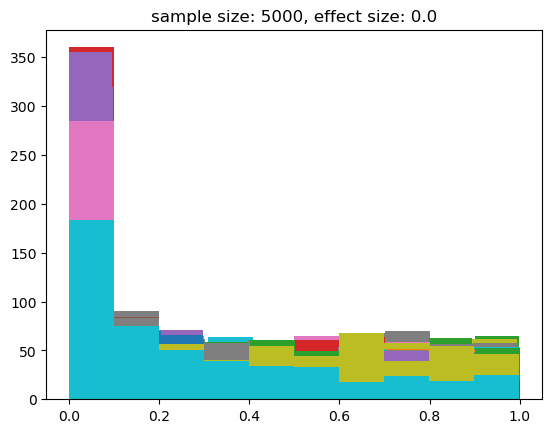

In [3]:
sample_size = [15, 30, 50, 100, 500, 5000]
effect_size = [0.0] #, 0.1, 0.2, 0.5, 1, 1.5
itr = 100
n_bootstrap = 500

for s, e in product(sample_size, effect_size):
    portions = np.zeros(itr) # ratio of p-values < 0.05 for each iteration
    pvalues = np.zeros(itr)

    for i in range(itr):
        #Sampling from normal distribution
        g1_samples = np.random.normal(loc=0.0, scale=1.0, size=s)
        g2_samples = np.random.normal(loc=e, scale=1.0, size=s)
        
        #original p-value
        t, pvalues[i] = stats.ttest_ind(g1_samples,g2_samples)

        g1_bootstraps = [np.random.choice(g1_samples,s) for j in range(n_bootstrap)]
        g2_bootstraps = [np.random.choice(g2_samples,s) for j in range(n_bootstrap)]
        original_cohort_pvalues = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

        plt.hist(original_cohort_pvalues)
        plt.title(f"sample size: {s}, effect size: {e}")

        portions[i] = len(list(filter(lambda p: p< 0.05,original_cohort_pvalues)))/len(original_cohort_pvalues)
    
    print(f"mean ratio: {np.mean(portions)}, mean p-value: {np.mean(pvalues)}")
    print(f"variance of the ratios: {np.var(portions)}, variance of p-values: {np.var(pvalues)}")
    plt.show()

## CDF delta distribution in different situations

In [15]:
cwd = Path(os.getcwd())

### Fixed sample size

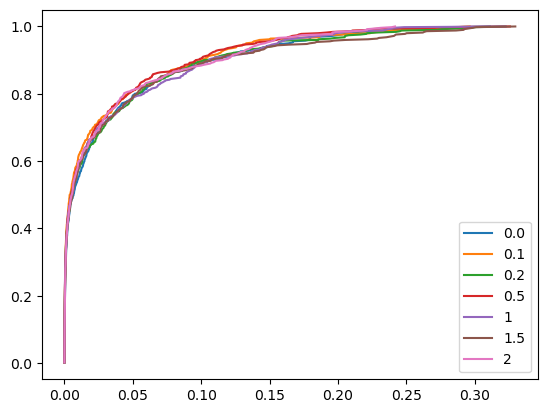

In [29]:
effect_size = [0, 0.1, 0.2, 0.5, 1, 1.5, 2]
s = 30
for e in effect_size:
    g1_samples = np.random.normal(loc=0.0, scale=1.0, size=s)
    g2_samples = np.random.normal(loc=e, scale=1.0, size=s)
    out = metric.pvalue_test([g1_samples, g2_samples], \
                stats.ttest_ind, 500, 500,cwd, f"normal_s{s}_e{e}")
    plt.plot(out[0][2], out[0][1])
plt.legend(effect_size)
plt.title(f"Sample size: {s}, n_bootstrap: 500, n_permutation: 500")
plt.show()

### Fixed effect size

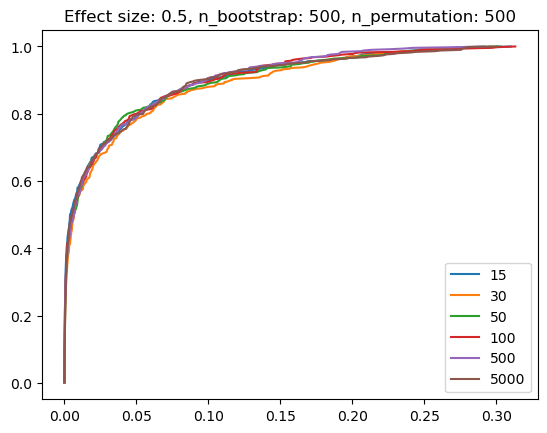

In [30]:
e = [0.5]
sample_size = [15, 30, 50, 100, 500, 5000]
for s in sample_size:
    g1_samples = np.random.normal(loc=0.0, scale=1.0, size=s)
    g2_samples = np.random.normal(loc=e, scale=1.0, size=s)
    out = metric.pvalue_test([g1_samples, g2_samples], \
                stats.ttest_ind, 500, 500,cwd, f"normal_s{s}_e{e}")
    plt.plot(out[0][2], out[0][1])
plt.legend(sample_size)
plt.title(f"Effect size: {e}, n_bootstrap: 500, n_permutation: 500")
plt.show()

In [ ]:
import importlib
importlib.reload(metric)

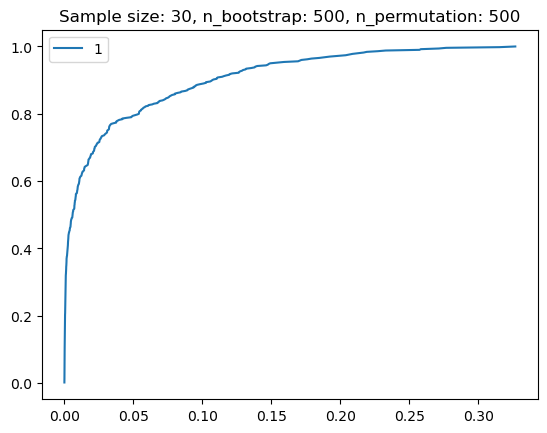

In [81]:
e = 1
s = 30

g1_samples = np.random.normal(loc=0.0, scale=1.0, size=s)
g2_samples = np.random.normal(loc=e, scale=1.0, size=s)
out = metric.pvalue_test([g1_samples, g2_samples], \
            stats.ttest_ind, 500, 500,cwd, f"normal_s{s}_e{e}")
plt.plot(out[0][2], out[0][1])
plt.legend(effect_size)
plt.title(f"Sample size: {s}, n_bootstrap: 500, n_permutation: 500")
plt.show()

In [82]:
permeuted_cohorts_pvalues_normal_s30_e1 = np.loadtxt(cwd / 'permeuted_cohorts_pvalues_normal_s30_e1.txt')
original_cohort_pvalues_normal_s30_e1 = np.loadtxt(cwd / 'original_cohort_pvalues_normal_s30_e1.txt' , delimiter=',')

Text(0.5, 1.0, 'Permeuted cohorts bootstrap p-values')

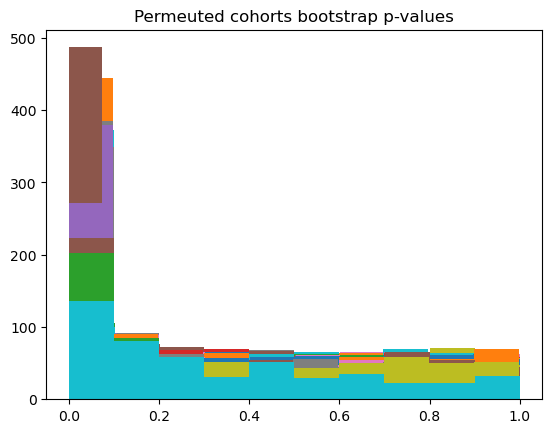

In [83]:
for i in range(500):
    plt.hist(permeuted_cohorts_pvalues_normal_s30_e1[i,:])
plt.title("Permeuted cohorts bootstrap p-values")

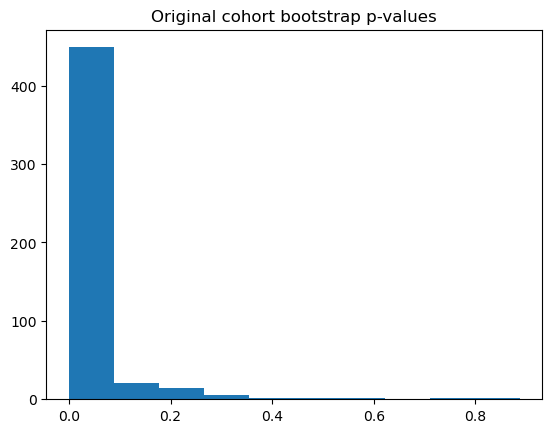

In [84]:
plt.hist(original_cohort_pvalues_normal_s30_e1)
plt.title("Original cohort bootstrap p-values")
plt.show()